In [11]:
# Bibliotecas principales para clustering, métricas y gráficos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

# Estilo gráfico alternativo
plt.style.use('seaborn-v0_8-muted')

In [12]:
# %%
# Función personalizada para crear un conjunto de datos disperso
def fabricar_datos(n=1500, rango=(-10, 10), semilla=7):
    np.random.seed(semilla)
    grupos = np.random.randint(3, 12)
    puntos_centro = []

    while len(puntos_centro) < grupos:
        nuevo = np.random.uniform(rango[0], rango[1], size=2)
        if all(np.linalg.norm(nuevo - c) > 2.8 for c in puntos_centro):
            puntos_centro.append(nuevo)

    desviaciones = np.random.uniform(0.2, 0.9, size=grupos)
    X, etiquetas = make_blobs(n_samples=n, centers=np.array(puntos_centro), 
                              cluster_std=desviaciones, random_state=semilla)
    return X, np.array(puntos_centro)


In [4]:
# %%
# Función para mostrar el dataset sin etiquetas
def ver_datos(X):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c='purple', alpha=0.5, s=15)
    plt.title("Vista general del conjunto generado")
    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.grid(alpha=0.2)
    plt.show()


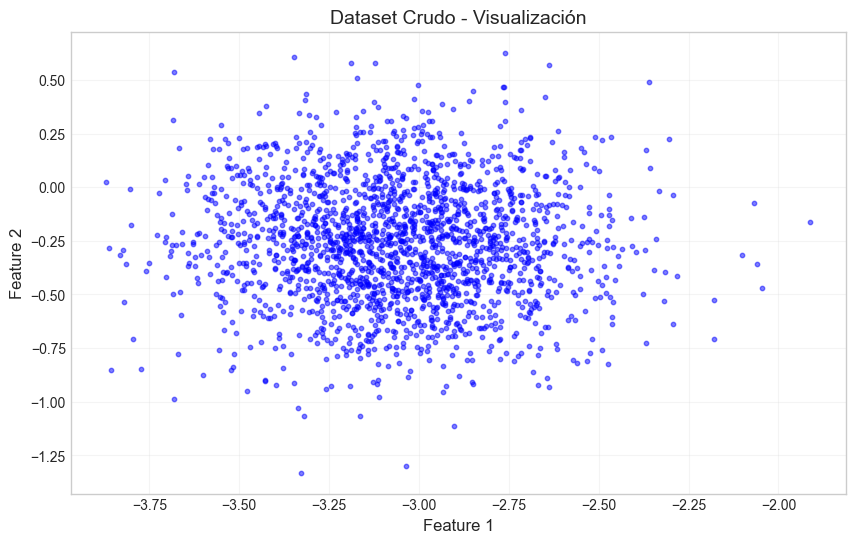

Coordenadas de los centroides generados:
[[-3.06035197 -0.25594955]]


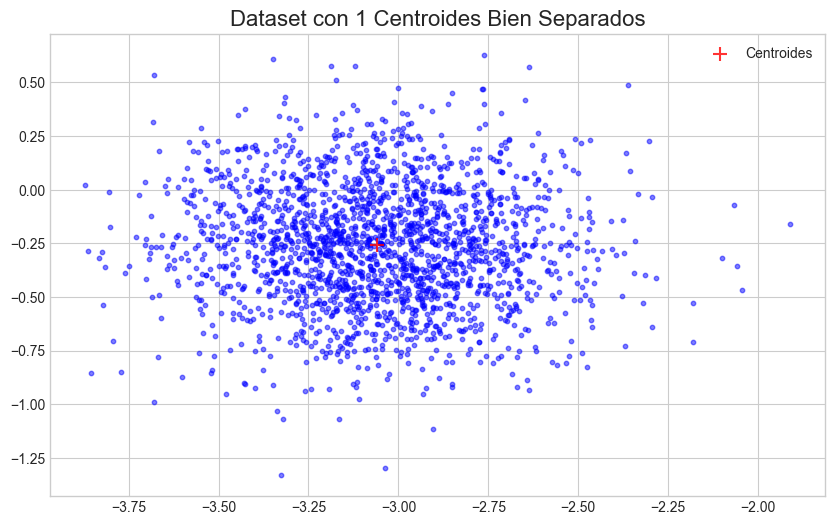

In [5]:
# %%
# ----
# PARTE 3: GENERAMOS Y VISUALIZAMOS EL DATASET
# ----

X, y_true, centers = generate_custom_dataset(n_samples=2000)

# Visualización cruda del dataset
plot_raw_data(X)

print("Coordenadas de los centroides generados:")
print(centers)

# Visualización con centroides
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, color='blue', alpha=0.5)
plot_centroids(centers)
plt.title(f"Dataset con {len(centers)} Centroides Bien Separados", fontsize=16)
plt.show()


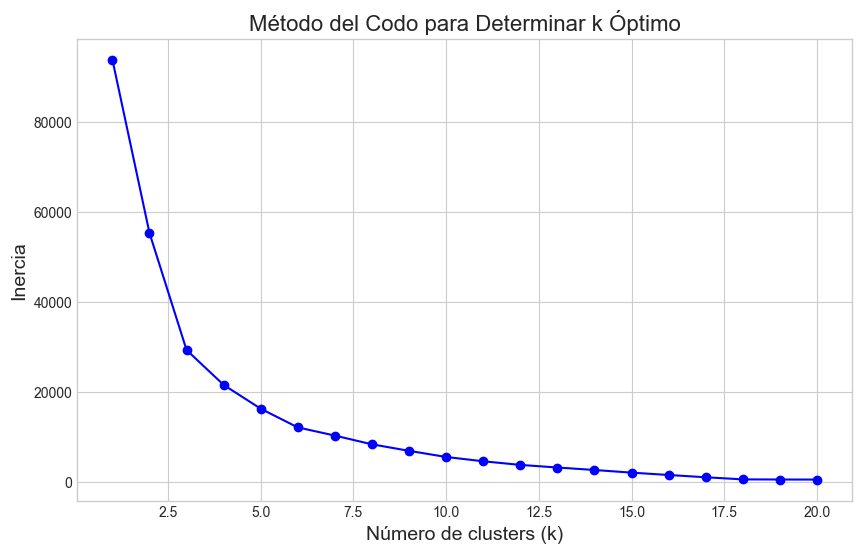

In [6]:
# %%
# ----
# PARTE 9: MÉTODO DEL CODO PARA ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS
# ----

k_range = range(1, 21)
inertias = []

for k in k_range:
    model = KMeans(n_clusters=k, random_state=None, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.title("Método del Codo para Determinar k Óptimo", fontsize=16)
plt.grid(True)
plt.show()


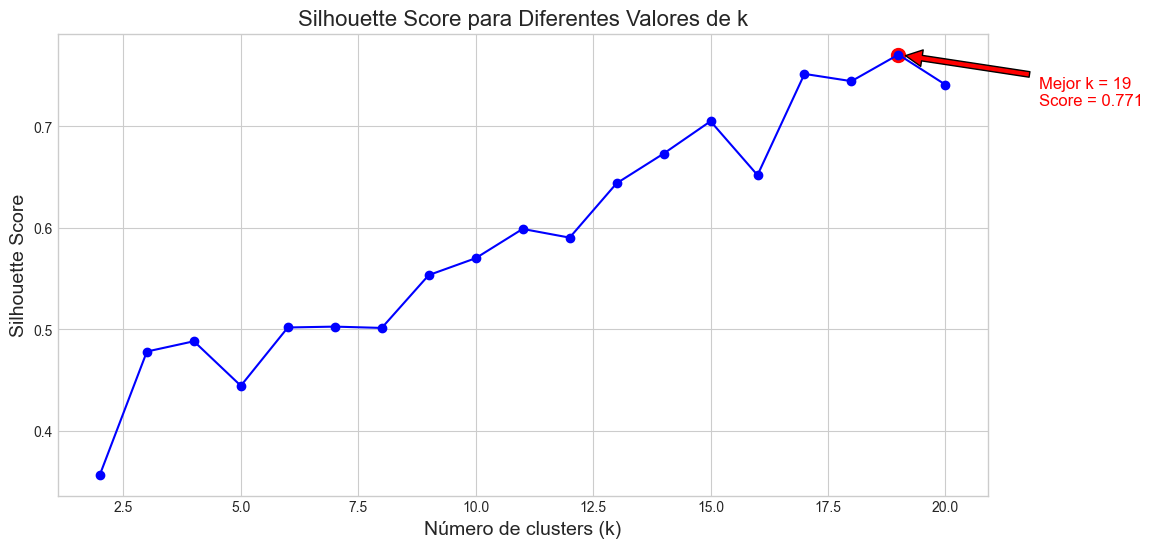

In [7]:
# %%
# ----
# PARTE 10: SILHOUETTE SCORE
# ----

kmeans_per_k = [KMeans(n_clusters=k, random_state=None).fit(X) for k in range(1, 21)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
optimal_k_silhouette = np.argmax(silhouette_scores) + 2

plt.figure(figsize=(12, 6))
plt.plot(range(2, 21), silhouette_scores, "bo-")
plt.xlabel("Número de clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score para Diferentes Valores de k", fontsize=16)
plt.grid(True)
plt.annotate(f'Mejor k = {optimal_k_silhouette}\nScore = {silhouette_scores[optimal_k_silhouette-2]:.3f}',
             xy=(optimal_k_silhouette, silhouette_scores[optimal_k_silhouette-2]),
             xytext=(optimal_k_silhouette+3, silhouette_scores[optimal_k_silhouette-2]-0.05),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')
plt.scatter([optimal_k_silhouette], [silhouette_scores[optimal_k_silhouette-2]], c='red', s=100)
plt.show()


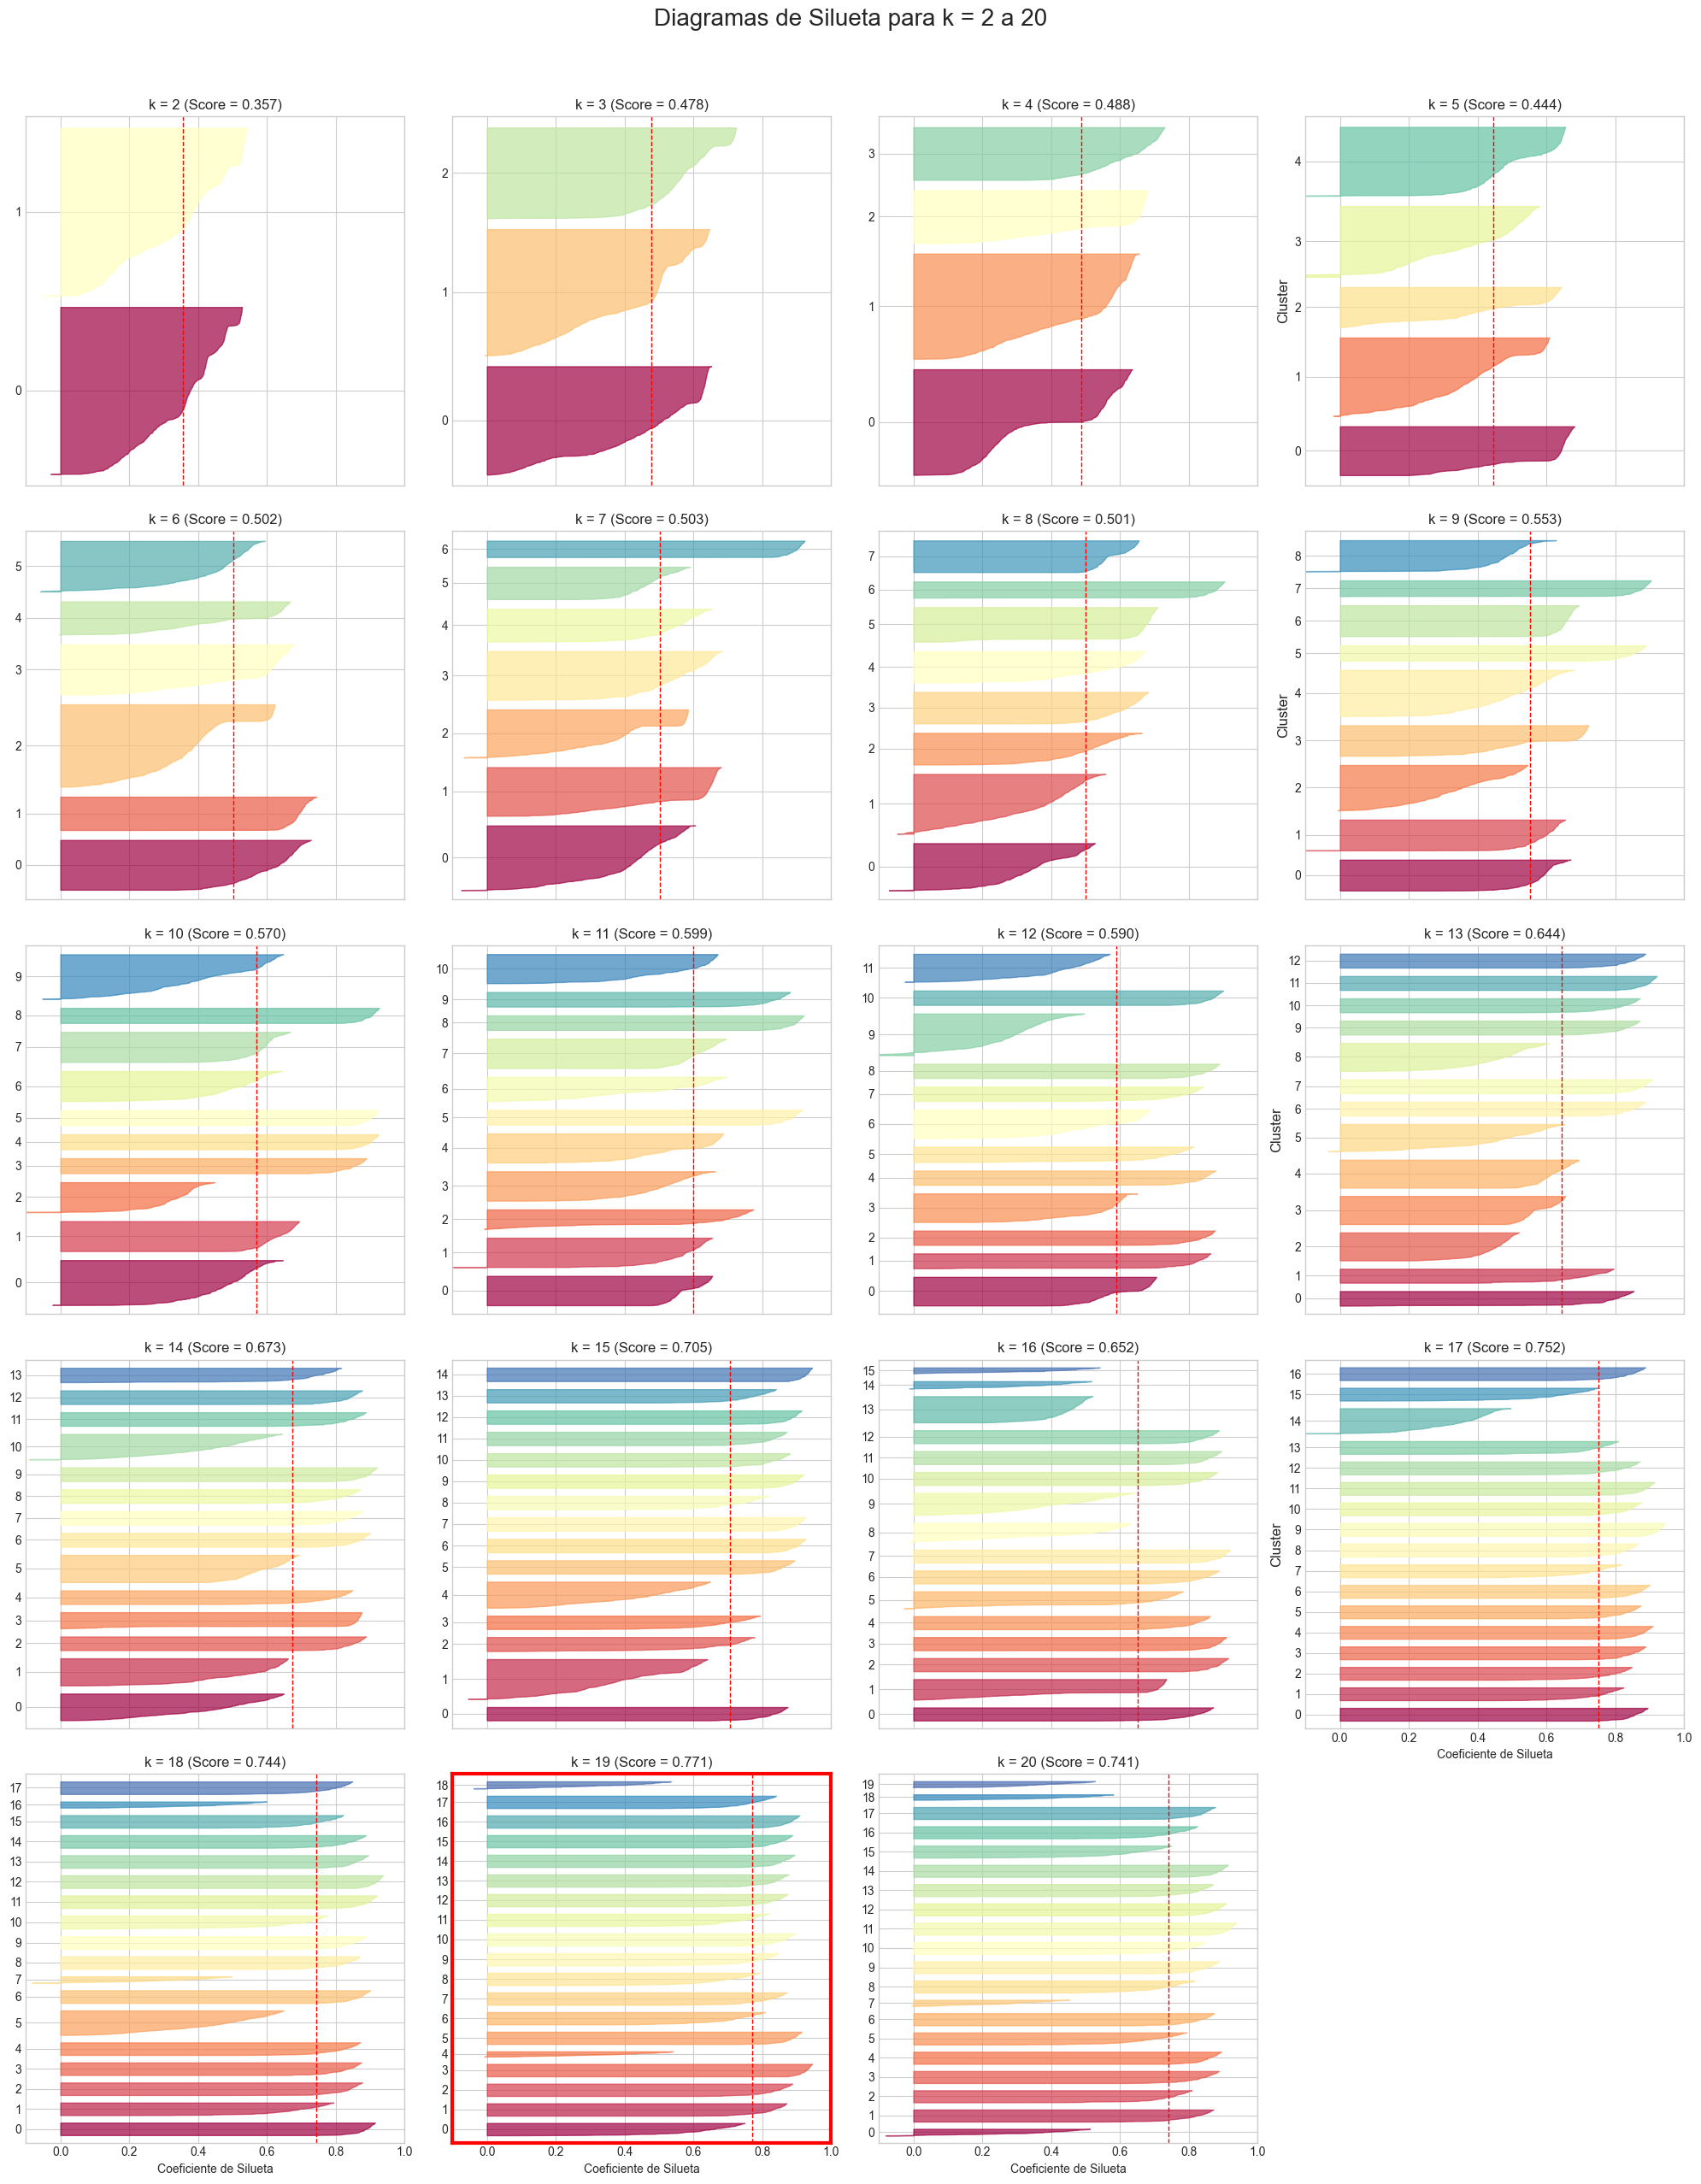

In [8]:
# %%
# ----
# PARTE 11: DIAGRAMAS DE SILUETA COMPLETOS (PARA TODOS LOS K)
# ----

plt.figure(figsize=(20, 25))
plt.suptitle("Diagramas de Silueta para k = 2 a 20", fontsize=20, y=1.02)

for k in range(2, 21):
    plt.subplot(5, 4, k-1)
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []

    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()
        color = mpl.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if (k-1) % 4 == 0:
        plt.ylabel("Cluster", fontsize=12)
    plt.axvline(x=silhouette_scores[k-2], color="red", linestyle="--", linewidth=1)
    if k == optimal_k_silhouette:
        for spine in plt.gca().spines.values():
            spine.set_color('red')
            spine.set_linewidth(3)
    plt.title(f"k = {k} (Score = {silhouette_scores[k-2]:.3f})", fontsize=12)
    plt.xlim(-0.1, 1)
    plt.ylim(0, pos)
    if k > 16:
        plt.xlabel("Coeficiente de Silueta", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)

plt.tight_layout()
plt.show()
